# Console Games Sales Decline 

You have been hired to join the in-house Data Science team of a video games design company. The company designs games for computers but is considering getting into the console games business.

Note: consoles refer to devices that are attached to TV’s. For example, Play Station.

However, the executives of the company have noticed that other rival console games design companies have been suffering increasing losses in the past couple of years. That’s why they want you to investigate the state of the industry to help them make the decision of whether to get into this business.

On the Case Study page you will find a dataset with over 16,000 console game titles sold between 1980 and 2015. Sales are broken down into 4 regions and are shown in Millions of Dollars.

The CSO (Chief Strategy Officer) has posed you the following questions:
1.  How have the total sales of console games been declining over the years by different genres?
2.  How do different platforms compare side-by-side in terms of aggregate global sales since their inceptions? Who is the leader?
3.  How do different publishers compare side-by-side in terms of aggregate global sales since their inceptions? Who is the leader?
4.  How do the New Generation (New Gen) consoles compare in terms of total global sales for combined 2014 and 2015? New Gen platforms in this dataset are PS4, XOne and WiiU.
5.  What are the top 10 game titles with the highest global sales?

## Credits

This notebook is a part of my learning path based on the workshop [Case Study 001 : [Tableau] Console Games Sales Decline](https://www.superdatascience.com/casestudy001/) presented on [Super Data Science](http://www.superdatascience.com) platform.

SuperDataScience team publish a lot of courses (available on the [Udemy](https://www.udemy.com) platform) taught by [Kirill Eremenko](https://www.udemy.com/user/kirilleremenko/) and [Hadelin de Ponteves](https://www.udemy.com/user/hadelin-de-ponteves/) in the wide space of Data Science.

Here are the most valuable one in the field of Data Science, Machine Learning and Deep Learning:
1. [Data Science A-Z™: Real-Life Data Science Exercises Included](https://www.udemy.com/datascience/learn/v4/overview)
2. [Python A-Z™: Python For Data Science With Real Exercises!](https://www.udemy.com/python-coding/learn/v4/overview)
3. [R Programming A-Z™: R For Data Science With Real Exercises!](https://www.udemy.com/r-programming/learn/v4/overview)
4. [Machine Learning A-Z™: Hands-On Python & R In Data Science](https://www.udemy.com/machinelearning/learn/v4/overview)
5. [Deep Learning A-Z™: Hands-On Artificial Neural Networks](https://www.udemy.com/deeplearning/learn/v4/overview)
6. [Artificial Intelligence A-Z™: Learn How To Build An AI](https://www.udemy.com/artificial-intelligence-az/learn/v4/overview)

## Preparation

**Import libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Use Seaborn styles.
# See 'Controlling figure aesthetics': https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_style('darkgrid')

**Load the data**

In [2]:
df = pd.read_csv("../../data/ConsoleGames.csv")
# See '10 Minutes to pandas': https://pandas.pydata.org/pandas-docs/stable/10min.html

**Check the structure of the data**

First, let's get a feel of what our data look like.

In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47


Let's see the type of our data, to better understand the structure behind it.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15979 entries, 0 to 15978
Data columns (total 10 columns):
Rank           15979 non-null int64
Name           15979 non-null object
Platform       15979 non-null object
Year           15979 non-null int64
Genre          15979 non-null object
Publisher      15945 non-null object
NA_Sales       15979 non-null float64
EU_Sales       15979 non-null float64
JP_Sales       15979 non-null float64
Other_Sales    15979 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.2+ MB


Let's see the informations on the numerical distribution of our dataset.

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15979.000000,15979.000000,15979.00000,15979.000000,15979.000000,15979.000000
mean,8224.104262,2006.197071,0.26976,0.149093,0.079514,0.048892
std,4775.817280,5.714810,0.82956,0.512557,0.314536,0.191612
min,1.000000,1980.000000,0.00000,0.000000,0.000000,0.000000
25%,4080.500000,2003.000000,0.00000,0.000000,0.000000,0.000000
50%,8207.000000,2007.000000,0.08000,0.020000,0.000000,0.010000
75%,12332.500000,2010.000000,0.24000,0.110000,0.040000,0.040000
max,16600.000000,2015.000000,41.49000,29.020000,10.220000,10.570000


Let's see the informations on the categorical distribution of our dataset.

In [6]:
df.describe(include = 'all') # include also non-numerical columns

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15979.000000,15979,15979,15979.000000,15979,15945,15979.00000,15979.000000,15979.000000,15979.000000
unique,NaN,11163,31,NaN,12,564,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN
freq,NaN,12,2132,NaN,3133,1319,NaN,NaN,NaN,NaN
mean,8224.104262,NaN,NaN,2006.197071,NaN,NaN,0.26976,0.149093,0.079514,0.048892
std,4775.817280,NaN,NaN,5.714810,NaN,NaN,0.82956,0.512557,0.314536,0.191612
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000
25%,4080.500000,NaN,NaN,2003.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000
50%,8207.000000,NaN,NaN,2007.000000,NaN,NaN,0.08000,0.020000,0.000000,0.010000
75%,12332.500000,NaN,NaN,2010.000000,NaN,NaN,0.24000,0.110000,0.040000,0.040000


In [7]:
def category_describe(data, col) :
    print(data[col].value_counts())
    print(data[col].value_counts().describe())

In [8]:
category_describe(df, 'Platform')

DS      2132
PS2     2127
Wii     1290
PS3     1272
X360    1227
PSP     1197
PS      1189
PC       905
GBA      811
XB       803
GC       542
3DS      465
PSV      350
N64      316
SNES     239
PS4      228
SAT      173
XOne     159
WiiU     133
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
count      31.000000
mean      515.451613
std       620.197057
min         1.000000
25%        39.500000
50%       228.000000
75%       858.000000
max      2132.000000
Name: Platform, dtype: float64


In [9]:
category_describe(df, 'Genre')

Action          3133
Sports          2266
Misc            1692
Role-Playing    1429
Shooter         1250
Adventure       1242
Racing          1206
Platform         866
Simulation       841
Fighting         822
Strategy         661
Puzzle           571
Name: Genre, dtype: int64
count      12.000000
mean     1331.583333
std       740.599445
min       571.000000
25%       836.250000
50%      1224.000000
75%      1494.750000
max      3133.000000
Name: Genre, dtype: float64


In [10]:
category_describe(df, 'Publisher')

Electronic Arts                           1319
Activision                                 952
Ubisoft                                    904
Namco Bandai Games                         888
Konami Digital Entertainment               815
THQ                                        712
Nintendo                                   686
Sony Computer Entertainment                677
Sega                                       622
Take-Two Interactive                       400
Capcom                                     358
Atari                                      346
Tecmo Koei                                 321
Disney Interactive Studios                 214
Square Enix                                211
Warner Bros. Interactive Entertainment     203
Eidos Interactive                          196
Midway Games                               196
Microsoft Game Studios                     185
505 Games                                  185
Acclaim Entertainment                      184
D3Publisher  

Let's find out which columns has Nan values.

In [11]:
# checking for missing values
print("Are there missing values? {}".format(df.isnull().any().any()))

df.isnull().sum()

Are there missing values? True


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher      34
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

Let's try to know more about the games with unidentified Publisher

In [12]:
#Let's affect this specific dataframe, as we will use it several times
publisher_null_df = df[df['Publisher'].isnull()]
publisher_null_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1632,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.0,0.02
2178,2224,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.0,0.02
3090,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01
3097,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01
3685,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.38,0.14,0.0,0.01
4428,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.31,0.11,0.0,0.01
4536,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.30,0.11,0.0,0.01
5516,5649,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.23,0.08,0.0,0.01
6272,6439,Sonic X: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.19,0.07,0.0,0.00
6396,6564,Dora the Explorer: Game Boy Advance Video Volu...,GBA,2004,Misc,NaN,0.18,0.07,0.0,0.00


In [13]:
publisher_null_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,34.000000,34.000000,34.000000,34.000000,34.0,34.000000
mean,9117.911765,2006.264706,0.170000,0.071471,0.0,0.002941
std,4554.649242,3.422818,0.199909,0.071314,0.0,0.005789
min,1664.000000,2004.000000,0.000000,0.000000,0.0,0.000000
25%,6470.250000,2004.000000,0.015000,0.022500,0.0,0.000000
50%,8356.500000,2004.000000,0.120000,0.050000,0.0,0.000000
75%,13617.500000,2009.250000,0.187500,0.095000,0.0,0.000000
max,16556.000000,2014.000000,0.870000,0.320000,0.0,0.020000


Let's drop the null values. As there is not much of them (34 for 15979 in total), it won't make much of a difference.

In [14]:
df = df.dropna()

## 1. How have the total sales of console games been declining over the years by different genres?

**Create the total sales of console games feature**

In [15]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

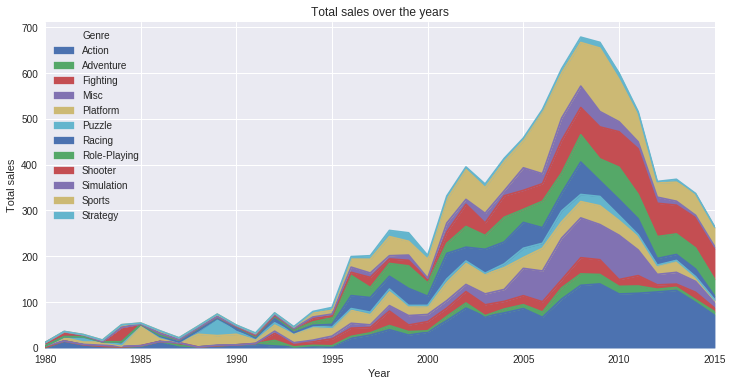

In [16]:
# See 'Explore Happiness Data Using Python Pivot Tables': https://www.dataquest.io/blog/pandas-pivot-table/

df_pivot_table = df.pivot_table(values = 'Total_Sales', index = 'Year', columns = 'Genre', aggfunc = 'sum')
df_pivot_table.plot(kind = 'area', figsize = (12, 6))
plt.title('Total sales over the years')
plt.ylabel('Total sales')
plt.show()

**Observation**  
Console games sales have been rapidly declining since 2008. Possibly, this could be attributed to the rising popularity of mobile devices and associated games.

## 2. How do different platforms compare side-by-side in terms of aggregate global sales since their inceptions? Who is the leader? 

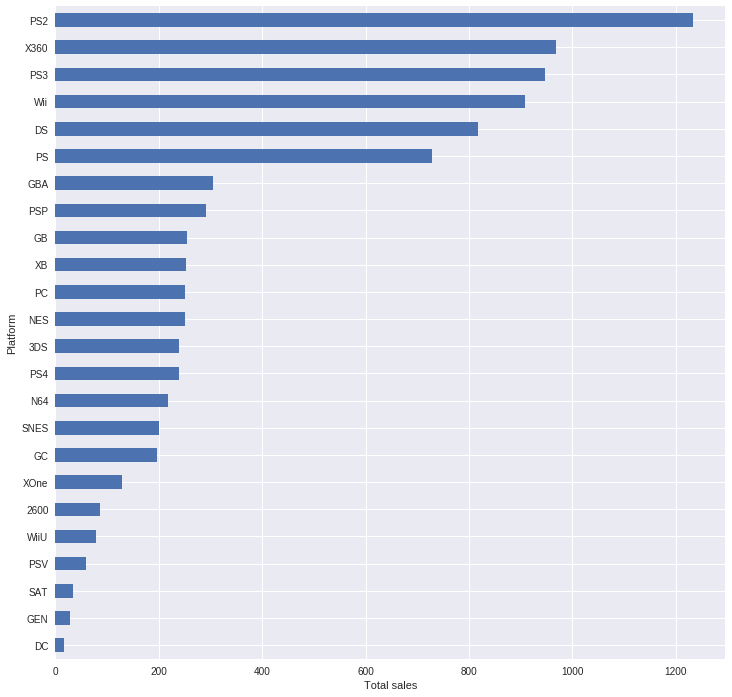

In [17]:
df_pivot_table = df.pivot_table(values = 'Total_Sales', index = 'Platform', aggfunc = 'sum').sort_values('Total_Sales')
df_pivot_table = df_pivot_table[df_pivot_table['Total_Sales'] > 5] # filter out platforms with smaller total sales
df_pivot_table.plot(kind = 'barh', legend = None, figsize = (12, 12))
plt.xlabel('Total sales')
plt.show()

**Observation**  
The all-time leader in the Global Games Sales among platforms is PS2 making $1.2B+

## 3. How do different publishers compare side-by-side in terms of aggregate global sales since their inceptions? Who is the leader? 

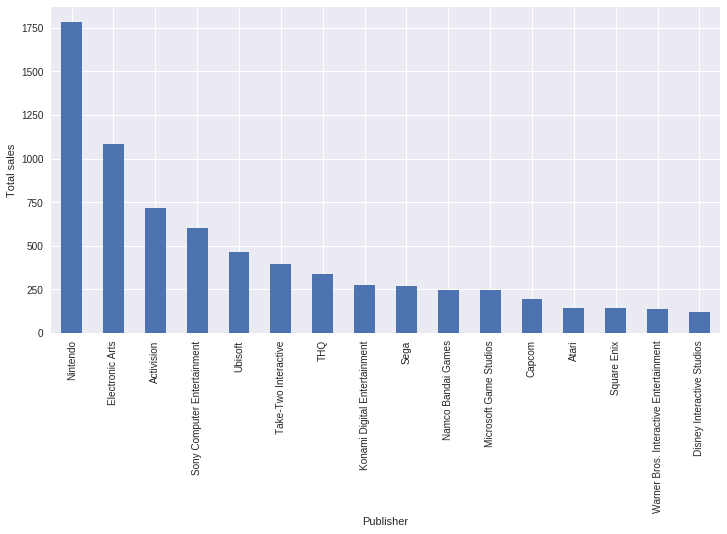

In [18]:
df_pivot_table = df.pivot_table(values = 'Total_Sales', index = 'Publisher', aggfunc = 'sum').sort_values('Total_Sales', ascending = False)
df_pivot_table = df_pivot_table[df_pivot_table['Total_Sales'] > 100] # filter out publishers with smaller total sales
df_pivot_table.plot(kind = 'bar', legend = None, figsize = (12, 6))
plt.ylabel('Total sales')
plt.show()

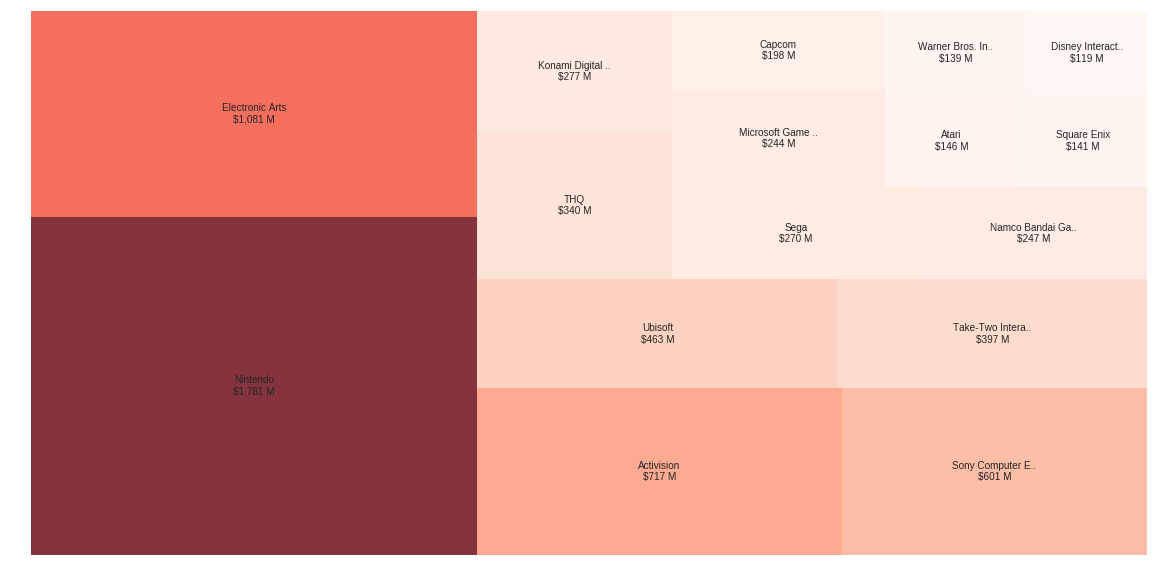

In [19]:
# See: https://github.com/laserson/squarify
import squarify

# create a color palette, mapped to Total_Sales
total_sales = df_pivot_table['Total_Sales'].tolist()
cmap = matplotlib.cm.Reds
mini=min(total_sales)
maxi=max(total_sales)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in total_sales]

max_label_size = 15
labels = df_pivot_table.index.tolist()
labels = [(label[:max_label_size] + '..') if len(label) > max_label_size else label for label in labels]
labels = [label + '\n' + '${:,.0f} M'.format(total_sales[idx]) for idx, label in enumerate(labels)]

plt.figure(figsize=(20, 10))
squarify.plot(sizes = total_sales, label = labels, alpha=.8, color=colors)
plt.axis('off')
plt.rc('font', size=16)
plt.show()

**Observation**  
In terms of publishers, Nintendo is the leader in Global Games Sales in $1.7B+ terms, however EA, Activision and Sony are leading in quantity of game titles.

## 4. How do the New Generation (New Gen) consoles compare in terms of total global sales for combined 2014 and 2015?

New Gen platforms in this dataset are **PS4**, **XOne** and **WiiU**.

In [20]:
df_year_filter = df['Year'].between(2014, 2015, inclusive = True)
df_platform_filter = df['Platform'].isin(['PS4', 'XOne', 'WiiU'])
df_pivot_table = df[df_year_filter & df_platform_filter].pivot_table('Total_Sales', index = 'Platform', aggfunc = 'sum')


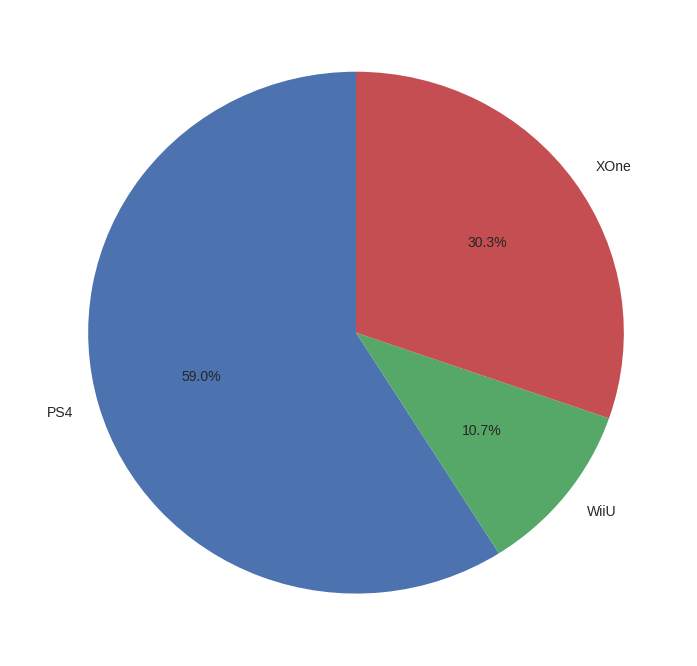

In [21]:
df_pivot_table.plot(y = 'Total_Sales', labels = df_pivot_table.index, kind = 'pie',
                    autopct = '%1.1f%%', startangle = 90, legend = False, fontsize = 14, figsize = (12, 12))
plt.axis('off')
plt.show()

**Observation**  
The Global Games Sales leader among new Gen consoles is PS4 accounting for more than half of the sales of all three platforms.

## 5. What are the top 10 game titles with the highest global sales?

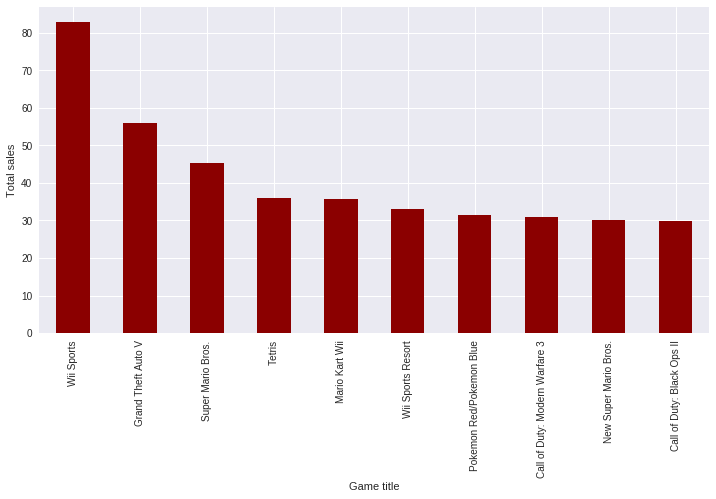

In [22]:
df_pivot_table = df.pivot_table(values = 'Total_Sales', index = 'Name', aggfunc = 'sum').sort_values('Total_Sales', ascending = False)
df_pivot_table = df_pivot_table.head(10) # filter out 10 top game titles

# create a color palette, mapped to Publisher
#
# unique_games = df.drop_duplicates('Name')[['Name', 'Publisher']].set_index('Name')
# df_pivot_table['Publisher'] = df_pivot_table.index.map(lambda game: unique_games.loc[game]['Publisher'])
# unique_publisher = df_pivot_table.drop_duplicates('Publisher')['Publisher'].tolist()
# cmap = matplotlib.cm.tab20c
# mini=0
# maxi=len(unique_publisher)
# norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
# colors = [cmap(norm(unique_publisher.index(game[1]))) for game in df_pivot_table.values]
#
# df_pivot_table.plot(kind = 'bar', legend = None, color = colors, figsize = (12, 6))

df_pivot_table.plot(kind = 'bar', legend = None, color = 'darkred', figsize = (12, 6))
plt.xlabel('Game title')
plt.ylabel('Total sales')
plt.show()

**Observation**  
Top 10 game titles in terms of all-time Global Games Sales.